In [ ]:
#calculate overlap of lesions with OCD hotspot from Garance, binary, change plot color based on subcohort, replace in df

In [1]:
from nilearn import image
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
import numpy as np
import nibabel as nib
import pandas as pd
import os, glob
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pearsonr, spearmanr
from scipy import stats
import seaborn  as sns

In [22]:
#resample canada capsulotomy subjects to allen brain
allen = load_img('/Users/jp1590/Documents/MATLAB/leaddbs/templates/space/MNI152NLin2009bAsym/labeling/Allen Brain Atlas (Ding 2020).nii')
zone12 = os.listdir('/Volumes/Cingulate/Cingulotomy/segmentations/cap/z1-2/canada')
for i in zone12:
    if i.startswith('sub'):
        sub = load_img(f'/Volumes/Cingulate/Cingulotomy/segmentations/cap/z1-2/canada/{i}')
        sub_re = resample_to_img(sub,allen)
        nib.save(sub_re,f'/Volumes/Cingulate/Cingulotomy/segmentations/resample/{i[0:10]}_canada_{i[10:50]}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/

In [55]:
#resampled
#make a mask of overlap, calculate the sum of intensity values inside
files = os.listdir('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/canada-zone1-2/resample')
efield = load_img('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
for i in files:
    if i.startswith('sub'):
#         sub = load_img(f'/Users/jp1590/Desktop/Capsulotomy/zone1-2/resample/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=efield)
#         nib.save(mask,f'/Users/jp1590/Desktop/Capsulotomy/zone1-2/mask/signif/{i}')
        masked_sub = load_img(f'/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/canada-zone1-2/mask/signif/{i}').get_fdata()
        values = np.sum(masked_sub)
        #print(i[0:10])
        print(i[0:10],':',values)

sub-OCD104 : 7.1166864931583405
sub-OCD105 : 155.5087168365717
sub-OCD108 : 229.1450158059597
sub-OCD106 : 81.16240280866623
sub-OCD102 : 75.23746293783188
sub-OCD101 : 24.938911989331245
sub-OCD1_c : 81.30547189712524
sub-OCD14_ : 112.41530105471611
sub-OCD2_c : 61.44386613368988
sub-OCD8_c : 80.1960071772337
sub-OCD5_c : 16.761683702468872
sub-OCD9_c : 15.596185609698296


In [57]:
#non-resampled
files = os.listdir('/Volumes/Cingulate/Capsulotomy/Canada/derivatives/leaddbs')
efield = load_img('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
for i in files:
    if i.startswith('sub-OCD'):
#         sub = load_img(f'/Volumes/Cingulate/Capsulotomy/Canada/derivatives/leaddbs/{i}/stimulations/MNI152NLin2009bAsym/{i}_sim-binary_model-simbio_hemi-bi.nii')
#         mask = math_img('img1*img2',img1=sub,img2=efield)
#         nib.save(mask,f'/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/canada-zone1-2/mask_non-resample/{i}.nii')
        masked_sub = load_img(f'/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/canada-zone1-2/mask_non-resample/{i}.nii').get_fdata()
        values = np.sum(masked_sub)
        #print(i[0:10])
        print(i,':',values)

sub-OCD9 : 67.43063479661942
sub-OCD1 : 130.55082394182682
sub-OCD8 : 81.27590465545654
sub-OCD108 : 180.5125518590212
sub-OCD106 : 70.12598133087158
sub-OCD101 : 31.808184936642647
sub-OCD2 : 103.93636779487133
sub-OCD5 : 13.031908422708511
sub-OCD102 : 51.39639310538769
sub-OCD105 : 186.33947031199932
sub-OCD104 : 9.747552633285522
sub-OCD14 : 135.4291246533394


PearsonRResult(statistic=0.3895255825625374, pvalue=0.21070722147353335)


[Text(0.5, 1.0, 'Correlation of DBS Hotspot Overlap and Clinical Outcome in Capsulotomies'),
 Text(0, 0.5, 'YBOCS12'),
 Text(0.5, 0, 'Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')]

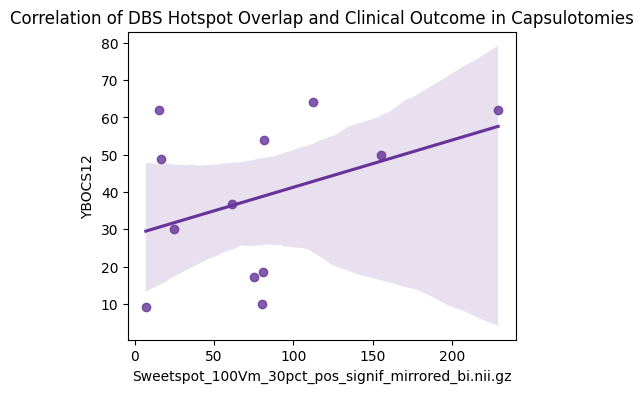

In [8]:
#plot correlation values and intensity sums
sig_df = pd.read_csv('/Users/jp1590/Desktop/Capsulotomy/zone1-2/mask/signif_overlap_mask_1y.csv')
print(pearsonr(sig_df["overlap"], sig_df["Relative_YBOCS_Change_1y"]))
plt.figure(figsize=(5,4))
ax = sns.regplot(data=sig_df, x="overlap", y="Relative_YBOCS_Change_1y",color='rebeccapurple')
ax.set(title='Correlation of DBS Hotspot Overlap and Clinical Outcome in Capsulotomies',ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')

PearsonRResult(statistic=0.5107063800595846, pvalue=0.08975431075225483)


[Text(0.5, 1.0, 'Correlation of DBS Hotspot Overlap and Clinical Outcome in Capsulotomies'),
 Text(0, 0.5, 'YBOCS6'),
 Text(0.5, 0, 'Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')]

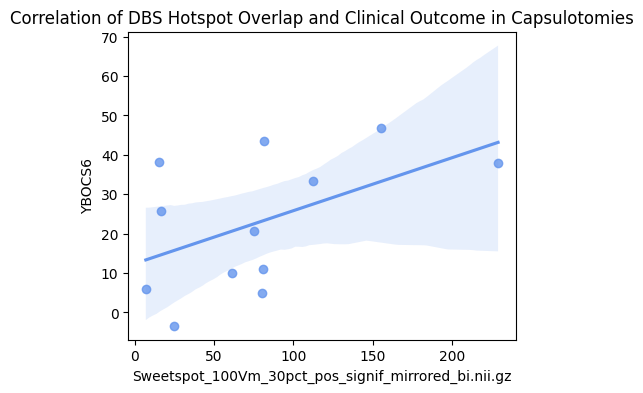

In [7]:
#plot correlation values and intensity sums
sig_6m_df = pd.read_csv('/Users/jp1590/Desktop/Capsulotomy/zone1-2/mask/signif_overlap_mask_6m.csv')
sig_6m_df.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
print(pearsonr(sig_6m_df["overlap"], sig_6m_df["Relative_YBOCS_Change_<1y"]))
plt.figure(figsize=(5,4))
ax = sns.regplot(data=sig_6m_df, x="overlap", y="Relative_YBOCS_Change_<1y",color='cornflowerblue')
ax.set(title='Correlation of DBS Hotspot Overlap and Clinical Outcome in Capsulotomies',ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')

calculating Y-BOCS6
Loading VTAs


/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_11679/677143645.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome['id'] = '/Volumes/Cingulate/Capsulotomy/Canada/derivatives/leaddbs/'+outcome['id']


Loading hotspots
Calculating overlaps


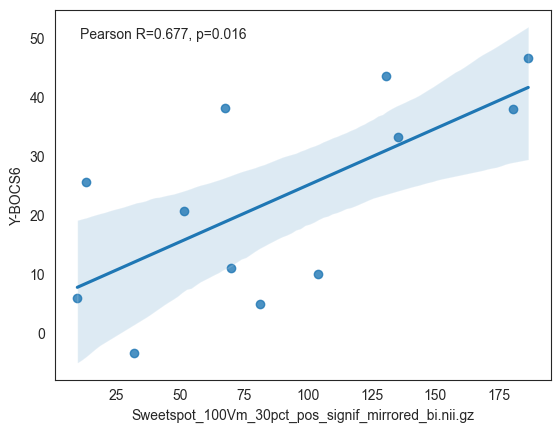

calculating Y-BOCS12
Loading VTAs


/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_11679/677143645.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome['id'] = '/Volumes/Cingulate/Capsulotomy/Canada/derivatives/leaddbs/'+outcome['id']


Loading hotspots
Calculating overlaps


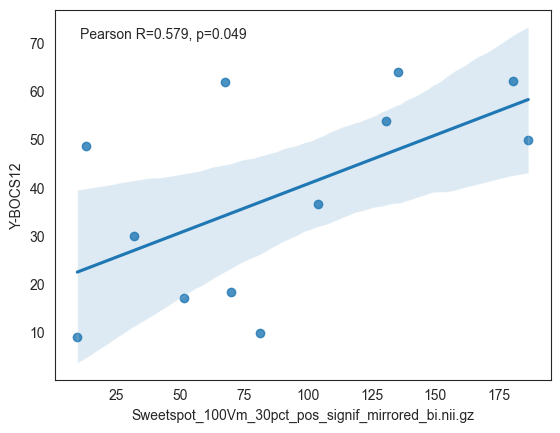

In [29]:
#replication
def compute_overlap(vtas_data, hotspots_data, x_of_scores):
    overlaps = np.zeros((len(vtas_data), len(hotspots_data)))
    
    for iv, v in enumerate(vtas_data):
        for ih, h in enumerate(hotspots_data):
            vol = v * h
            
            if x_of_scores == 'mean':
                overlaps[iv, ih] = np.nanmean(vol)
            elif x_of_scores == 'sum':
                overlaps[iv, ih] = np.nansum(vol)
    
    return overlaps

#Define Variables
outc = 'Y-BOCS' #Depression
hotspots = glob.glob(os.path.join('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz'))
all_outcomes_bi = pd.read_csv('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Response_bilat.csv')

if outc == 'Y-BOCS':
    outcome_var = ['Y-BOCS6','Y-BOCS12']
elif outc == 'Depression':
    outcome_var = ['HAMD6','HAMD12']

x_of_scores = 'sum'

for i in outcome_var:
    print('calculating',i)
    outcome = all_outcomes_bi[all_outcomes_bi[i].notna()]
    outcome['id'] = '/Volumes/Cingulate/Capsulotomy/Canada/derivatives/leaddbs/'+outcome['id']
    print('Loading VTAs')
    vtas = [image.load_img(ig).get_fdata() for ig in outcome.id]
    print('Loading hotspots')
    hotspot_imgs = [image.load_img(hs).get_fdata() for hs in hotspots]
    print('Calculating overlaps')
    overlaps = compute_overlap(vtas, hotspot_imgs, x_of_scores)
       
    df = pd.DataFrame(overlaps)
    df.index = outcome['id']
    df.index = [idx.split('/')[-1] for idx in df.index]
    df.columns = [hs.split('/')[-1] for hs in hotspots]

    outcome_bi = all_outcomes_bi[all_outcomes_bi[i].notna()].set_index('id')

#Correlate bilateral volume overlap with bilateral clinical outcome  
    for c in df.columns:
        r_val, p_val = stats.pearsonr(df[c],outcome_bi[i])
        sns.set_style('white')
        ax = sns.regplot(x=df[c],y=outcome_bi[i])
        ax.text(0.05, 0.95, 'Pearson R={:.3f}, p={:.3f}'.format(r_val, p_val),
        transform=ax.transAxes, verticalalignment='top')
        plt.savefig(f"bilat_{i}_plot_{c}.png")
        plt.show()

calculating Y-BOCS6
Loading VTAs


/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_11679/373503851.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome['id'] = '/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/canada-zone1-2/resample/'+outcome['id']


Loading hotspots
Calculating overlaps


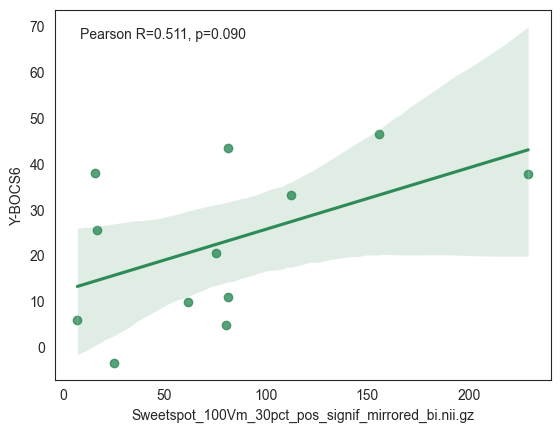

calculating Y-BOCS12
Loading VTAs


/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_11679/373503851.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome['id'] = '/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/canada-zone1-2/resample/'+outcome['id']


Loading hotspots
Calculating overlaps


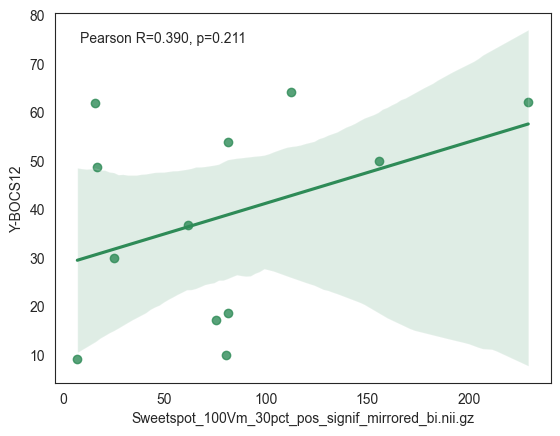

In [16]:
#with resampled subjects
def compute_overlap(vtas_data, hotspots_data, x_of_scores):
    overlaps = np.zeros((len(vtas_data), len(hotspots_data)))
    
    for iv, v in enumerate(vtas_data):
        for ih, h in enumerate(hotspots_data):
            vol = v * h
            
            if x_of_scores == 'mean':
                overlaps[iv, ih] = np.nanmean(vol)
            elif x_of_scores == 'sum':
                overlaps[iv, ih] = np.nansum(vol)
    
    return overlaps

#Define Variables
outc = 'Y-BOCS' #Depression
hotspots = glob.glob(os.path.join('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz'))
all_outcomes_bi = pd.read_csv('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Response_bilat-res.csv')

if outc == 'Y-BOCS':
    outcome_var = ['Y-BOCS6','Y-BOCS12']
elif outc == 'Depression':
    outcome_var = ['HAMD6','HAMD12']

x_of_scores = 'sum'

for i in outcome_var:
    print('calculating',i)
    outcome = all_outcomes_bi[all_outcomes_bi[i].notna()]
    outcome['id'] = '/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/canada-zone1-2/resample/'+outcome['id']
    print('Loading VTAs')
    vtas = [image.load_img(ig).get_fdata() for ig in outcome.id]
    print('Loading hotspots')
    hotspot_imgs = [image.load_img(hs).get_fdata() for hs in hotspots]
    print('Calculating overlaps')
    overlaps = compute_overlap(vtas, hotspot_imgs, x_of_scores)
       
    df = pd.DataFrame(overlaps)
    df.index = outcome['id']
    df.index = [idx.split('/')[-1] for idx in df.index]
    df.columns = [hs.split('/')[-1] for hs in hotspots]

    outcome_bi = all_outcomes_bi[all_outcomes_bi[i].notna()].set_index('id')

#Correlate bilateral volume overlap with bilateral clinical outcome  
    for c in df.columns:
        r_val, p_val = stats.pearsonr(df[c],outcome_bi[i])
        sns.set_style('white')
        ax = sns.regplot(x=df[c],y=outcome_bi[i],color='seagreen')
        ax.text(0.05, 0.95, 'Pearson R={:.3f}, p={:.3f}'.format(r_val, p_val),
        transform=ax.transAxes, verticalalignment='top')
        plt.savefig(f"bilat_{i}_plot_{c}.png")
        plt.show()

In [ ]:
#capsulotomy and sct

In [10]:
#resample sct subjects to allen brain
allen = load_img('/Users/jp1590/Documents/MATLAB/leaddbs/templates/space/MNI152NLin2009bAsym/labeling/Allen Brain Atlas (Ding 2020).nii')
zone12 = os.listdir('/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/sct/z1-2')
for i in zone12:
    if i.startswith('sub'):
        sub = load_img(f'/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/sct/z1-2/{i}')
        sub_re = resample_to_img(sub,allen)
        nib.save(sub_re,f'/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/sct/resample/{i}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/

In [49]:
#resample brazil capsulotomy subjects to allen brain
allen = load_img('/Users/jp1590/Documents/MATLAB/leaddbs/templates/space/MNI152NLin2009bAsym/labeling/Allen Brain Atlas (Ding 2020).nii')
zone12 = os.listdir('/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/cap/z1-2/brazil')
for i in zone12:
    if i.startswith('sub'):
        sub = load_img(f'/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/cap/z1-2/brazil/{i}')
        sub_re = resample_to_img(sub,allen)
        nib.save(sub_re,f'/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/brazil-zone1-2/resample/{i[0:10]}brazil_zones1-2.nii')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/

In [ ]:
#make a mask of brazil capsulotomy overlap, calculate the sum of intensity values inside
files = os.listdir('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/brazil-zone1-2/resample')
efield = load_img('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/Sweetspot_100Vm_30pct_pos_nosignif_mirrored_bi.nii.gz')
for i in files:
    if i.startswith('sub'):
        sub = load_img(f'/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/brazil-zone1-2/resample/{i}')
        mask = math_img('img1*img2',img1=sub,img2=efield)
        nib.save(mask,f'/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/brazil-zone1-2/mask/nosignif/{i}')
        masked_sub = load_img(f'/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/brazil-zone1-2/mask/nosignif/{i}').get_fdata()
        cap_values = np.sum(masked_sub)
        #print(i[0:10])
        #print(cap_values)

In [ ]:
#make a mask of sct overlap, calculate the sum of intensity values inside for signif
files = os.listdir('/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/sct/resample')
efield = load_img('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/Capsulotomy/Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
for i in files:
    if i.startswith('sub'):
        sub = load_img(f'/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/sct/resample/{i}')
        mask = math_img('img1*img2',img1=sub,img2=efield)
        nib.save(mask,f'/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/sct/mask/{i}')
        masked_sub = load_img(f'/Users/jp1590/Dropbox (Partners HealthCare)/Backup/Cingulotomy/segmentations/sct/mask/{i}').get_fdata()
        sct_values = np.sum(masked_sub)
        #print(i[:-37])
        #print(sct_values)

YBOCS 6m: PearsonRResult(statistic=-0.12667435343376143, pvalue=0.6164580630230665)
YBOCS 1y: PearsonRResult(statistic=0.039735342813092205, pvalue=0.829050768804438)


Text(0.05, 0.95, 'Pearson R=0.039, p=0.829')

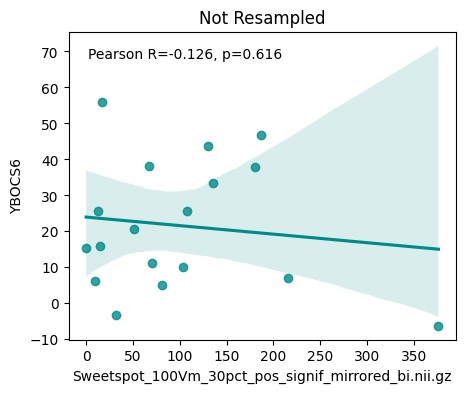

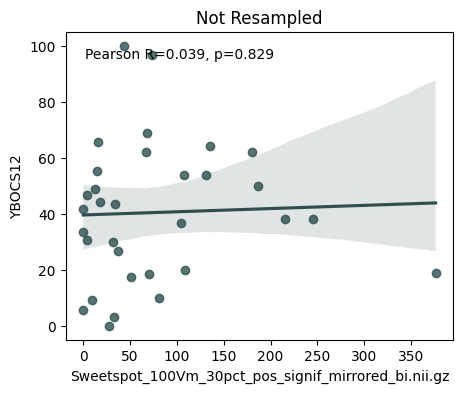

In [57]:
#pos signif mirrored not resampled
c_sct_sig_df = pd.read_csv('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/signif_overlap_mask_cap_sct-notres.csv')
c_sct_sig_df.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
print('YBOCS 6m:',pearsonr(c_sct_sig_df["overlap"], c_sct_sig_df["Relative_YBOCS_Change_<1y"]))
plt.figure(figsize=(5,4))
ax = sns.regplot(data=c_sct_sig_df, x="overlap", y="Relative_YBOCS_Change_<1y",color='darkcyan')
ax.set(title='Not Resampled',ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.126, p=0.616',transform=ax.transAxes, verticalalignment='top')

ca_sct_sig_df = pd.read_csv('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/signif_overlap_mask_cap_sct-notres.csv')
ca_sct_sig_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 1y:',pearsonr(ca_sct_sig_df["overlap"], ca_sct_sig_df["Relative_YBOCS_Change_1y"]))
plt.figure(figsize=(5,4))
ax = sns.regplot(data=ca_sct_sig_df, x="overlap", y="Relative_YBOCS_Change_1y",color='darkslategrey')
ax.set(title='Not Resampled',ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.039, p=0.829',transform=ax.transAxes, verticalalignment='top')

YBOCS 6m: PearsonRResult(statistic=-0.17618167772598242, pvalue=0.48435586355327737)
YBOCS 1y: PearsonRResult(statistic=0.00955405832330905, pvalue=0.9586109789762853)


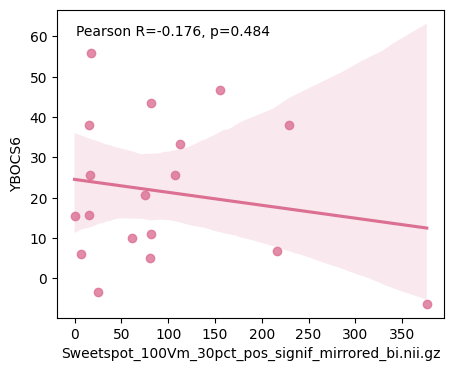

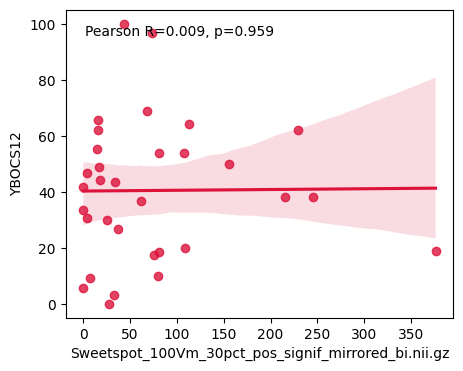

In [58]:
#pos signif mirrored
c_sct_sig_df = pd.read_csv('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/signif_overlap_mask_cap_sct-res.csv')
c_sct_sig_df.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
print('YBOCS 6m:',pearsonr(c_sct_sig_df["overlap"], c_sct_sig_df["Relative_YBOCS_Change_<1y"]))
plt.figure(figsize=(5,4))
ax = sns.regplot(data=c_sct_sig_df, x="overlap", y="Relative_YBOCS_Change_<1y",color='palevioletred')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.176, p=0.484',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/pos_signif_mirrored_6m.png')

cap_sct_sig_df = pd.read_csv('/Users/jp1590/Desktop/Cingulotomy/OCD_Hotspots/signif_overlap_mask_cap_sct-res.csv')
cap_sct_sig_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 1y:',pearsonr(cap_sct_sig_df["overlap"], cap_sct_sig_df["Relative_YBOCS_Change_1y"]))
plt.figure(figsize=(5,4))
ax = sns.regplot(data=cap_sct_sig_df, x="overlap", y="Relative_YBOCS_Change_1y",color='crimson')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.009, p=0.959',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/pos_signif_mirrored_1y.png')

YBOCS 6m: PearsonRResult(statistic=0.0025585414813878234, pvalue=0.9919609555878346)
YBOCS 1y: PearsonRResult(statistic=0.09519510175383651, pvalue=0.6042772775446246)


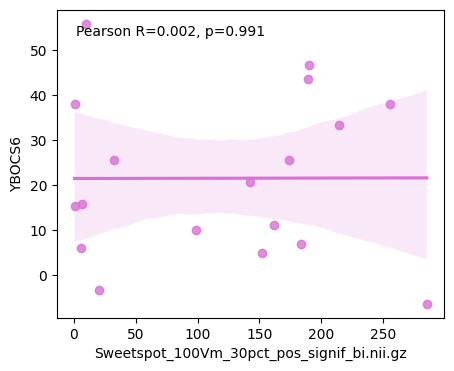

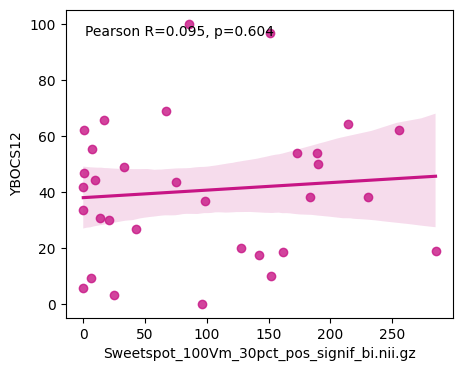

In [144]:
#pos_signif bi
# files = os.listdir('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub')
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_pos_signif_bi.nii.gz')
# bi_pos_signif = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/pos_signif_bi/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/pos_signif_bi/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         bi_pos_signif.append(values)
#         ids.append(i)
        
# bi_pos_signif_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':bi_pos_signif
#     })

# bi_pos_signif_combined_df = bi_pos_signif_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# bi_pos_signif_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/pos_signif_bi.csv')

bip6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/pos_signif_bi.csv')
bip12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/pos_signif_bi.csv')

bip6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
bip12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 6m:',pearsonr(bip6["Volume_Overlap"], bip6["Relative_YBOCS_Change_<1y"]))
print('YBOCS 1y:',pearsonr(bip12["Volume_Overlap"], bip12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bip6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='orchid')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_pos_signif_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.002, p=0.991',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/pos_signif_bi_6m.png')

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bip12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='mediumvioletred')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_pos_signif_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.095, p=0.604',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/pos_signif_bi_1y.png')

YBOCS 6m: PearsonRResult(statistic=-0.31387860304596676, pvalue=0.2046467929666369)
YBOCS 1y: PearsonRResult(statistic=0.02077707211904374, pvalue=0.9101346492665625)


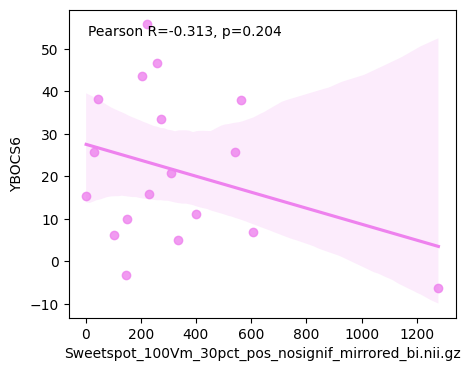

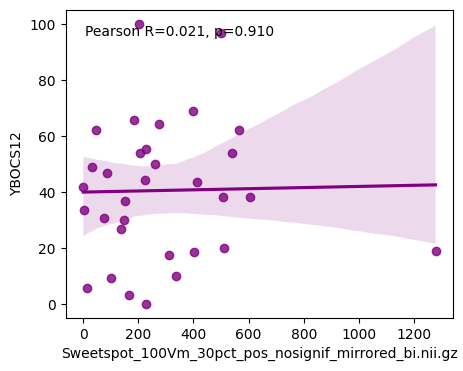

In [142]:
#pos_nosignif mirrored
# files = os.listdir('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub')
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_pos_nosignif_mirrored_bi.nii.gz')
# ybocs_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/ybocs_id.csv')
# nosignif = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/pos_nosignif_mirrored/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/pos_nosignif_mirrored/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         nosignif.append(values)
#         ids.append(i)
        
# nosignif_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':nosignif
#     })

# nosignif_combined_df = nosignif_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# nosignif_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/nosignif_mirrored.csv')

nos6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/nosignif_mirrored.csv')
nos12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/nosignif_mirrored.csv')

nos6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
nos12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 6m:',pearsonr(nos6["Volume_Overlap"], nos6["Relative_YBOCS_Change_<1y"]))
print('YBOCS 1y:',pearsonr(nos12["Volume_Overlap"], nos12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=nos6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='violet')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_pos_nosignif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.313, p=0.204',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/pos_nosignif_mirrored_6m.png')

plt.figure(figsize=(5,4))
ax = sns.regplot(data=nos12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='purple')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_pos_nosignif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.021, p=0.910',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/pos_nosignif_mirrored_1y.png')

YBOCS 6m: PearsonRResult(statistic=-0.25057641245643303, pvalue=0.3159075509740853)
YBOCS 1y: PearsonRResult(statistic=0.01933561722853923, pvalue=0.9163467142118582)


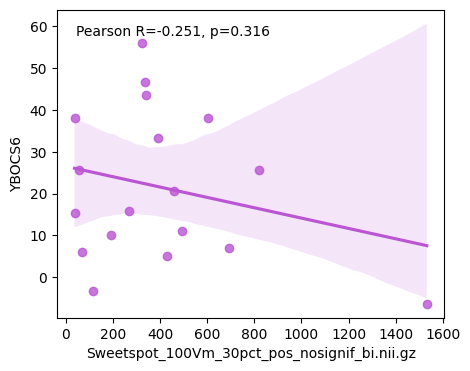

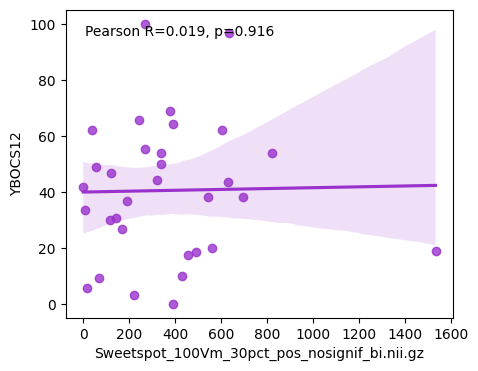

In [140]:
#pos_nosignif bi
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_pos_nosignif_bi.nii.gz')
# nosignif_bi = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/pos_nosignif_bi/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/pos_nosignif_bi/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         nosignif_bi.append(values)
#         ids.append(i)
        
# bi_nosignif_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':nosignif_bi
#     })

# bi_nosignif_combined_df = bi_nosignif_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# bi_nosignif_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/nosignif_bi.csv')

bino6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/nosignif_bi.csv')
bino12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/nosignif_bi.csv')

bino6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
bino12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 6m:',pearsonr(bino6["Volume_Overlap"], bino6["Relative_YBOCS_Change_<1y"]))
print('YBOCS 1y:',pearsonr(bino12["Volume_Overlap"], bino12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bino6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='mediumorchid')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_pos_nosignif_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.251, p=0.316',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/pos_nosignif_bi_6m.png')

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bino12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='darkorchid')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_pos_nosignif_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.019, p=0.916',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/pos_nosignif_bi_1y.png')

YBOCS 6m: PearsonRResult(statistic=-0.028178280420404603, pvalue=0.9116251129303969)
YBOCS 1y: PearsonRResult(statistic=-0.04294800624949373, pvalue=0.8154569390266335)


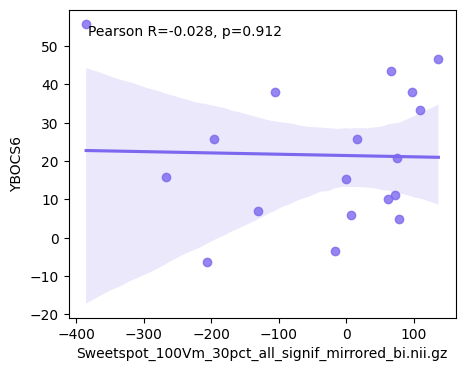

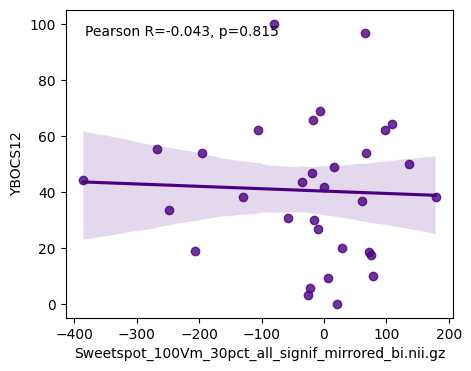

In [138]:
#all_signif mirrored
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_all_signif_mirrored_bi.nii.gz')
# allsignif = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/all_signif_mirrored/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/all_signif_mirrored/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         allsignif.append(values)
#         ids.append(i)
        
# allsignif_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':allsignif
#     })

# allsignif_combined_df = allsignif_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# allsignif_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allsignif_mirrored.csv')

allm6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allsignif_mirrored.csv')
allm12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allsignif_mirrored.csv')

allm6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
allm12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 6m:',pearsonr(allm6["Volume_Overlap"], allm6["Relative_YBOCS_Change_<1y"]))
print('YBOCS 1y:',pearsonr(allm12["Volume_Overlap"], allm12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=allm6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='mediumslateblue')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_all_signif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.028, p=0.912',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/all_signif_mirrored_6m.png')

plt.figure(figsize=(5,4))
ax = sns.regplot(data=allm12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='indigo')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_all_signif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.043, p=0.815',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/all_signif_mirrored_1y.png')

YBOCS 6m: PearsonRResult(statistic=0.04547257296092677, pvalue=0.8578078875292299)
YBOCS 1y: PearsonRResult(statistic=0.046231032068710945, pvalue=0.8016196612149848)


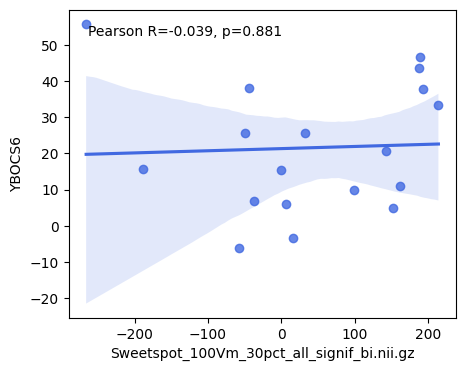

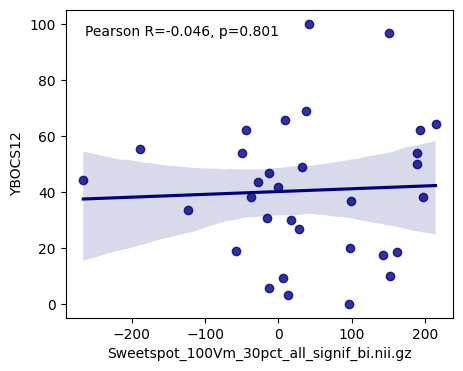

In [136]:
#all_signif bi
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_all_signif_bi.nii.gz')
# allsignif_bi = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/all_signif_bi/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/all_signif_bi/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         allsignif_bi.append(values)
#         ids.append(i)
        
# bi_allsignif_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':allsignif_bi
#     })

# bi_allsignif_combined_df = bi_allsignif_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# bi_allsignif_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allsignif_bi.csv')

bia6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allsignif_bi.csv')
bia12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allsignif_bi.csv')

bia6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
bia12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 6m:',pearsonr(bia6["Volume_Overlap"], bia6["Relative_YBOCS_Change_<1y"]))
print('YBOCS 1y:',pearsonr(bia12["Volume_Overlap"], bia12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bia6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='royalblue')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_all_signif_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.039, p=0.881',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/all_signif_bi_6m.png')

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bia12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='navy')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_all_signif_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.046, p=0.801',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/all_signif_bi_1y.png')

YBOCS 6m: PearsonRResult(statistic=-0.10901469140521511, pvalue=0.666764108297414)
YBOCS 1y: PearsonRResult(statistic=-0.02201445824216223, pvalue=0.904806176831546)


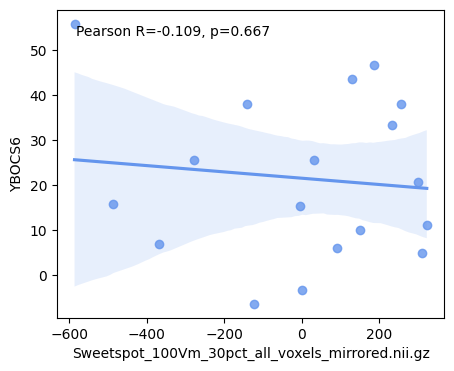

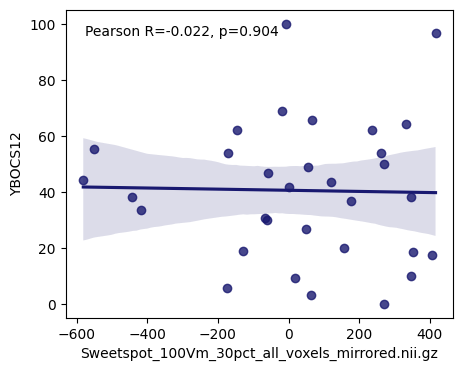

In [64]:
#all_voxels mirrored
# files = os.listdir('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub')
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_allvoxels_mirrored_bi.nii.gz')
# ybocs_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/ybocs_id.csv')
# allvoxels = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/all_voxels_mirrored/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/all_voxels_mirrored/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         allvoxels.append(values)
#         ids.append(i)
        
# allvoxels_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':allvoxels
#     })

# allvoxels_combined_df = allvoxels_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# allvoxels_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allvoxels_mirrored.csv')

all6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allvoxels_mirrored.csv')
all6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
print('YBOCS 6m:',pearsonr(all6["Volume_Overlap"], all6["Relative_YBOCS_Change_<1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=all6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='cornflowerblue')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_all_voxels_mirrored.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.109, p=0.667',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/all_voxels_mirrored_6m.png')

all12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allvoxels_bi.csv')
all12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 1y:',pearsonr(all12["Volume_Overlap"], all12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=all12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='midnightblue')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_all_voxels_mirrored.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.022, p=0.904',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/all_voxels_mirrored_1y.png')

YBOCS 6m: PearsonRResult(statistic=0.00035096269206913894, pvalue=0.9988972440066546)
YBOCS 1y: PearsonRResult(statistic=-0.02201445824216223, pvalue=0.904806176831546)


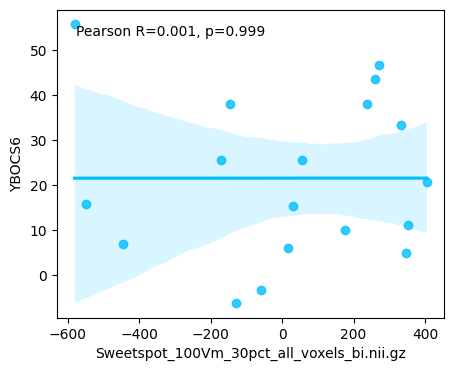

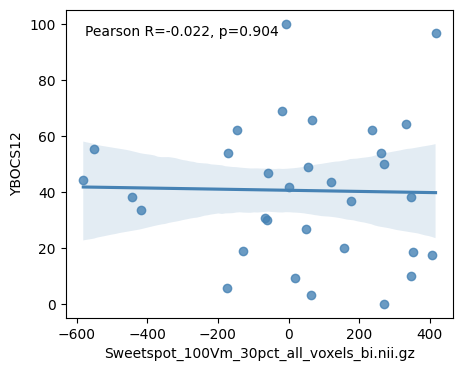

In [65]:
#all_voxels bi
# files = os.listdir('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub')
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_allvoxels_bi.nii.gz')
# ybocs_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/ybocs_id.csv')
# bi_allvoxels = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/all_voxels_bi/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/all_voxels_bi/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         bi_allvoxels.append(values)
#         ids.append(i)
        
# bi_allvoxels_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':bi_allvoxels
#     })

#bi_allvoxels_combined_df = bi_allvoxels_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
bi_allvoxels_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allvoxels_bi.csv')

bi6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allvoxels_bi.csv')
bi6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
print('YBOCS 6m:',pearsonr(bi6["Volume_Overlap"], bi6["Relative_YBOCS_Change_<1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bi6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='deepskyblue')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_all_voxels_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.001, p=0.999',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/all_voxels_bi_6m.png')

bi12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allvoxels_bi.csv')
bi12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 1y:',pearsonr(bi12["Volume_Overlap"], bi12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bi12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='steelblue')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_all_voxels_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.022, p=0.904',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/all_voxels_bi_1y.png')

YBOCS 6m: PearsonRResult(statistic=0.073401832698044, pvalue=0.7722363605514009)
YBOCS 1y: PearsonRResult(statistic=-0.04387067246669689, pvalue=0.8115623787287649)


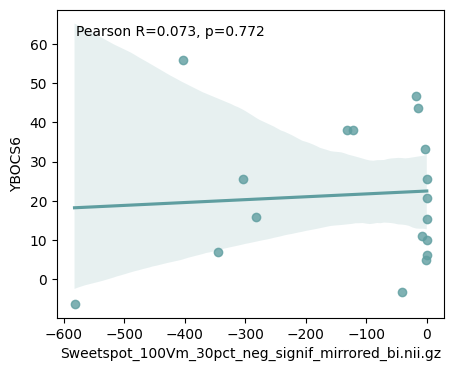

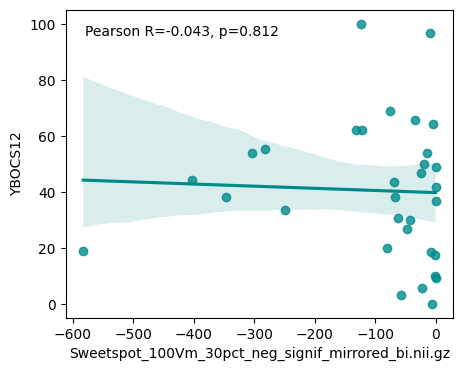

In [134]:
#neg signif mirrored
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_neg_signif_mirrored_bi.nii.gz')
# negsignif = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/negsignif_mirrored/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/negsignif_mirrored/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         negsignif.append(values)
#         ids.append(i)
        
# negsignif_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':negsignif
#     })

# negsignif_combined_df = negsignif_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# negsignif_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/negsignif_mirrored.csv')

mneg6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/negsignif_mirrored.csv')
mneg12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/negsignif_mirrored.csv')

mneg6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
print('YBOCS 6m:',pearsonr(mneg6["Volume_Overlap"], mneg6["Relative_YBOCS_Change_<1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=mneg6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='cadetblue')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_neg_signif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.073, p=0.772',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/neg_signif_mirrored_6m.png')

mneg12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 1y:',pearsonr(mneg12["Volume_Overlap"], mneg12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=mneg12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='darkcyan')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_neg_signif_mirrored_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.043, p=0.812',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/neg_signif_mirrored_1y.png')

YBOCS 6m: PearsonRResult(statistic=0.05119873706712014, pvalue=0.8401082903004118)
YBOCS 1y: PearsonRResult(statistic=-0.03339574619449704, pvalue=0.8560150831121454)


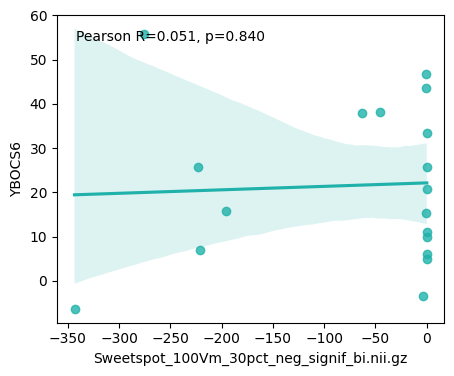

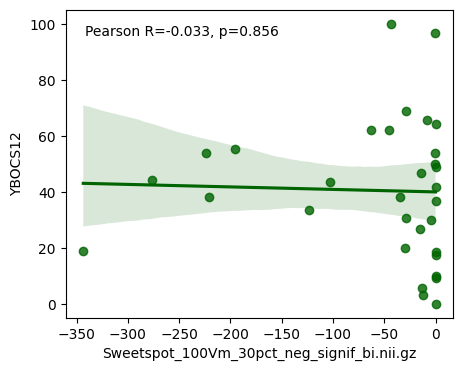

In [132]:
#neg signif bi
hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Sweetspot_100Vm_30pct_neg_signif_bi.nii.gz')
# negsignif_bi = []
# ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/negsignif_bi/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/negsignif_bi/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         negsignif_bi.append(values)
#         ids.append(i)
        
# negsignif_bi_df = pd.DataFrame(
#     {'ID':ids,
#     'Volume_Overlap':negsignif_bi
#     })

# bi_negsignif_combined_df = negsignif_bi_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# bi_negsignif_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/negsignif_bi.csv')

bineg6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/negsignif_bi.csv')
bineg12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/negsignif_bi.csv')

bineg6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
print('YBOCS 6m:',pearsonr(bineg6["Volume_Overlap"], bineg6["Relative_YBOCS_Change_<1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bineg6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='lightseagreen')
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_neg_signif_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.051, p=0.840',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/neg_signif_bi_6m.png')

bineg12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 1y:',pearsonr(bineg12["Volume_Overlap"], bineg12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=bineg12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='darkgreen')
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_neg_signif_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.033, p=0.856',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/neg_signif_bi_1y.png')

YBOCS 6m: PearsonRResult(statistic=-0.25779724463023834, pvalue=0.3016924671496756)
YBOCS 1y: PearsonRResult(statistic=0.06300270603154232, pvalue=0.731930905961669)


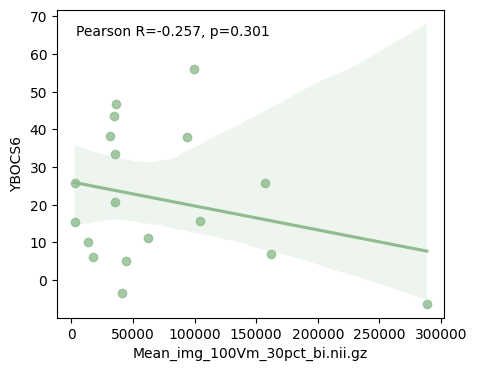

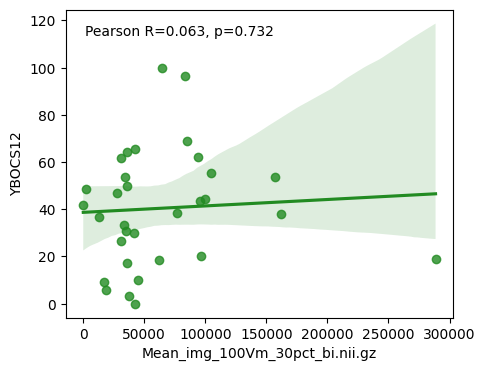

In [122]:
#mean img
# hotspot = load_img('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/Y-BOCS/Mean_img_100Vm_30pct_bi.nii.gz')
# mean_img = []
# m_ids = []
# for i in files:
#     if i.startswith('sub'):
#         sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/sub/{i}')
#         mask = math_img('img1*img2',img1=sub,img2=hotspot)
#         nib.save(mask,f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/mean_img/{i}')
#         masked_sub = load_img(f'/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/masks/mean_img/{i}').get_fdata()
#         values = np.sum(masked_sub)
#         mean_img.append(values)
#         m_ids.append(i)
        
# mean_img_df = pd.DataFrame(
#     {'ID':m_ids,
#     'Volume_Overlap':mean_img
#     })

# mean_img_combined_df = mean_img_df.merge(ybocs_df,how='left',left_on=['ID'],right_on=['ID'])
# mean_img_combined_df.to_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/mean_img.csv')

m6 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/mean_img.csv')
m6.dropna(subset=['Relative_YBOCS_Change_<1y'], inplace=True)
print('YBOCS 6m:',pearsonr(m6["Volume_Overlap"], m6["Relative_YBOCS_Change_<1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=m6, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",color='darkseagreen')
ax.set(ylabel='YBOCS6',xlabel='Mean_img_100Vm_30pct_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=-0.257, p=0.301',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/mean_img_6m.png')

m12 = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/mean_img.csv')
m12.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('YBOCS 1y:',pearsonr(m12["Volume_Overlap"], m12["Relative_YBOCS_Change_1y"]))

plt.figure(figsize=(5,4))
ax = sns.regplot(data=m12, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",color='forestgreen')
ax.set(ylabel='YBOCS12',xlabel='Mean_img_100Vm_30pct_bi.nii.gz')
ax.text(0.05, 0.95, 'Pearson R=0.063, p=0.732',transform=ax.transAxes, verticalalignment='top')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/mean_img_1y.png')

In [88]:
#scatterplots

<Figure size 500x400 with 0 Axes>

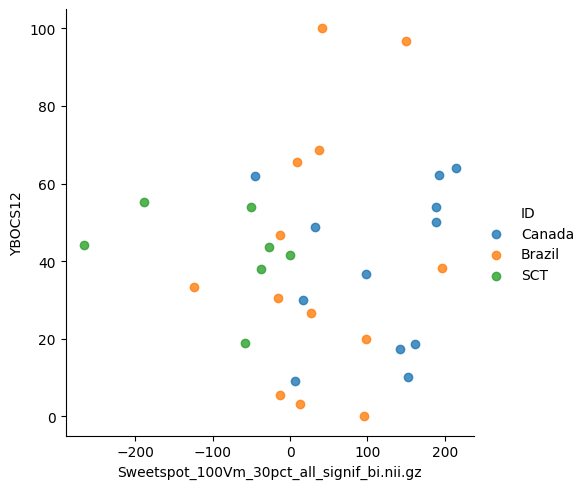

<Figure size 500x400 with 0 Axes>

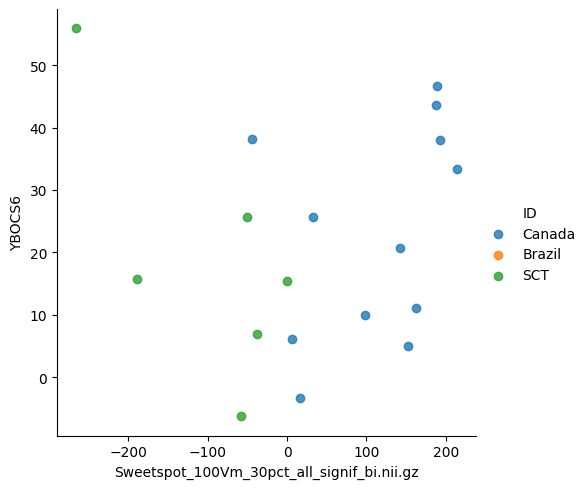

In [146]:
asb = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allsignif_bi.csv')
for i in asb['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        asb['ID'] = asb['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        asb['ID'] = asb['ID'].replace(i,'Brazil')
    else:
        asb['ID'] = asb['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=asb, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_all_signif_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/allsignif_bi_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=asb, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_all_signif_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/allsignif_bi_6m.png')

<Figure size 500x400 with 0 Axes>

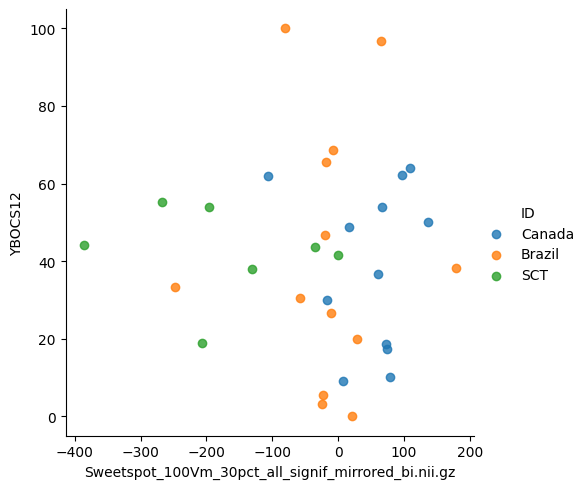

<Figure size 500x400 with 0 Axes>

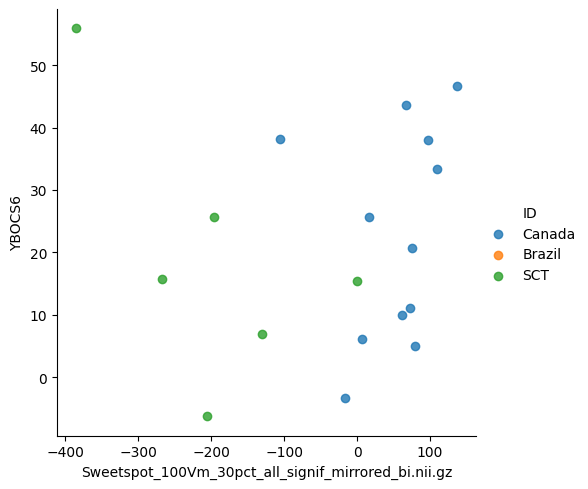

In [148]:
asm = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allsignif_mirrored.csv')
for i in asm['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        asm['ID'] = asm['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        asm['ID'] = asm['ID'].replace(i,'Brazil')
    else:
        asm['ID'] = asm['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=asm, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_all_signif_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/allsignif_mirrored_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=asm, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_all_signif_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/allsignif_mirrored_6m.png')

<Figure size 500x400 with 0 Axes>

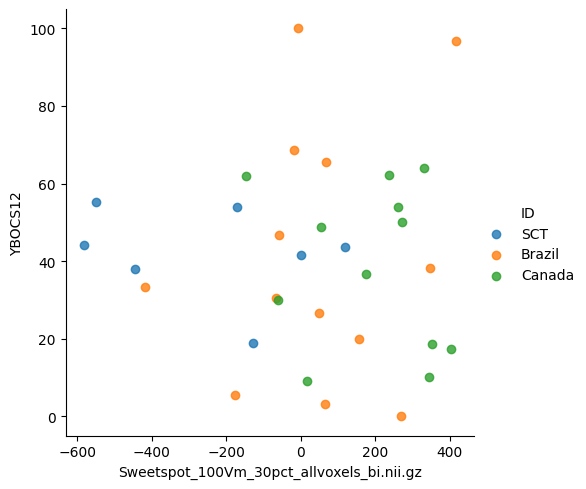

<Figure size 500x400 with 0 Axes>

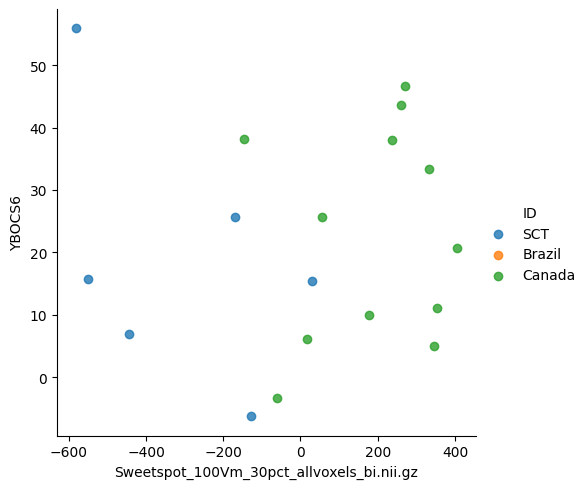

In [150]:
avb = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allvoxels_bi.csv')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=avb, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_allvoxels_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/allvoxels_bi_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=avb, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_allvoxels_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/allvoxels_bi_6m.png')

<Figure size 500x400 with 0 Axes>

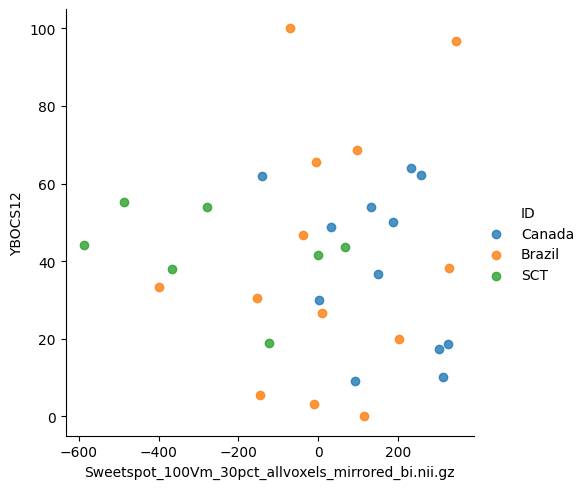

<Figure size 500x400 with 0 Axes>

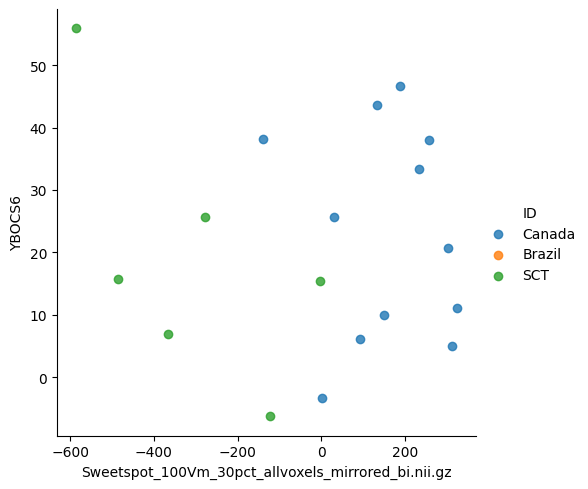

In [151]:
avm = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/allvoxels_mirrored.csv')
for i in avm['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        avm['ID'] = avm['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        avm['ID'] = avm['ID'].replace(i,'Brazil')
    else:
        avm['ID'] = avm['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=avm, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_allvoxels_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/allvoxels_mirrored_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=avm, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_allvoxels_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/allvoxels_mirrored_6m.png')

<Figure size 500x400 with 0 Axes>

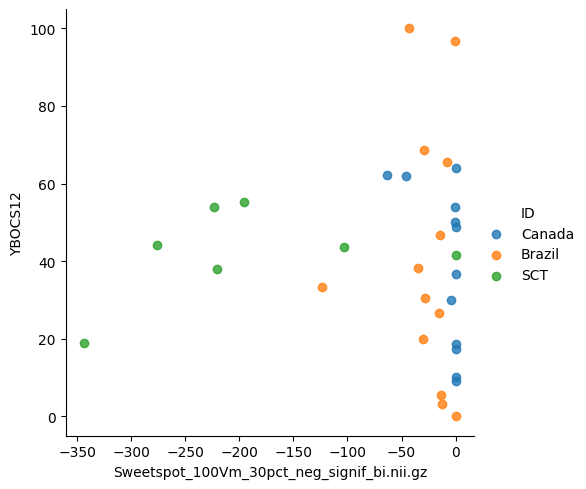

<Figure size 500x400 with 0 Axes>

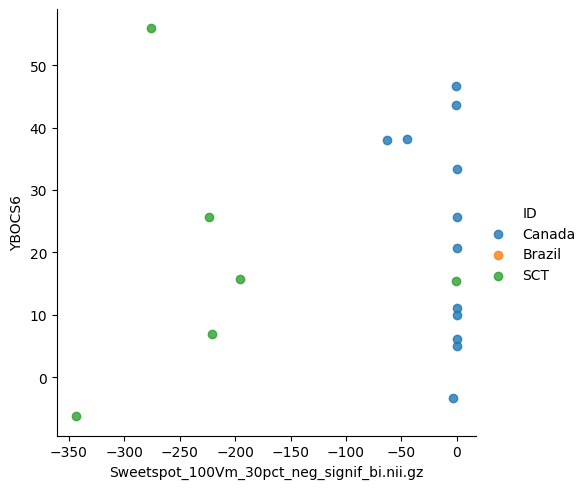

In [152]:
nsb = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/negsignif_bi.csv')
for i in nsb['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        nsb['ID'] = nsb['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        nsb['ID'] = nsb['ID'].replace(i,'Brazil')
    else:
        nsb['ID'] = nsb['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=nsb, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_neg_signif_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/negsignif_bi_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=nsb, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_neg_signif_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/negsignif_bi_6m.png')

<Figure size 500x400 with 0 Axes>

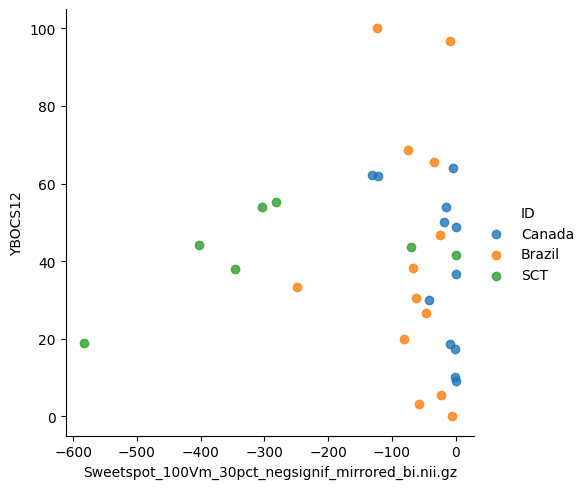

<Figure size 500x400 with 0 Axes>

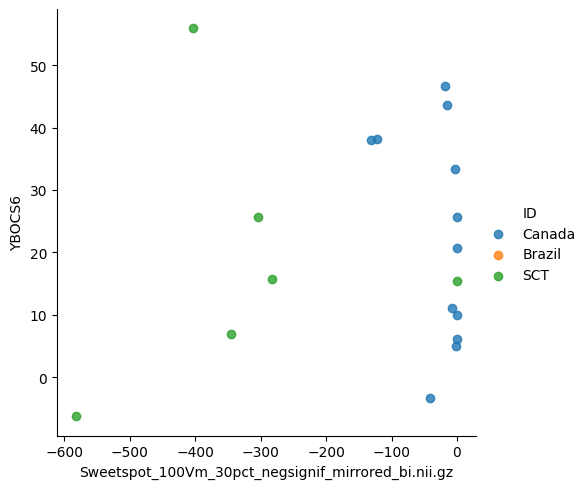

In [153]:
nsm = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/negsignif_mirrored.csv')
for i in nsm['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        nsm['ID'] = nsm['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        nsm['ID'] = nsm['ID'].replace(i,'Brazil')
    else:
        nsm['ID'] = nsm['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=nsm, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_negsignif_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/negsignif_mirrored_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=nsm, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_negsignif_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/negsignif_mirrored_6m.png')

<Figure size 500x400 with 0 Axes>

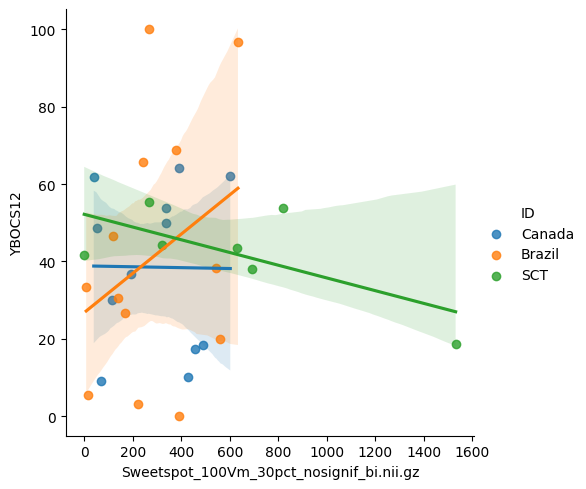

<Figure size 500x400 with 0 Axes>

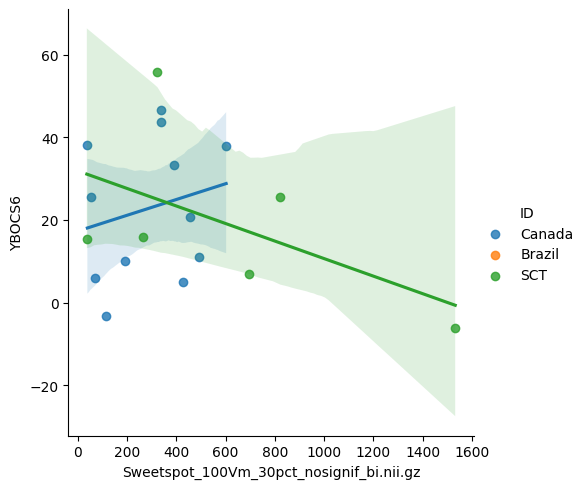

In [161]:
nsfb = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/nosignif_bi.csv')
for i in nsfb['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        nsfb['ID'] = nsfb['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        nsfb['ID'] = nsfb['ID'].replace(i,'Brazil')
    else:
        nsfb['ID'] = nsfb['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=nsfb, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=True)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_nosignif_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/trend-nosignif_bi_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=nsfb, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=True)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_nosignif_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/trend-nosignif_bi_6m.png')

<Figure size 500x400 with 0 Axes>

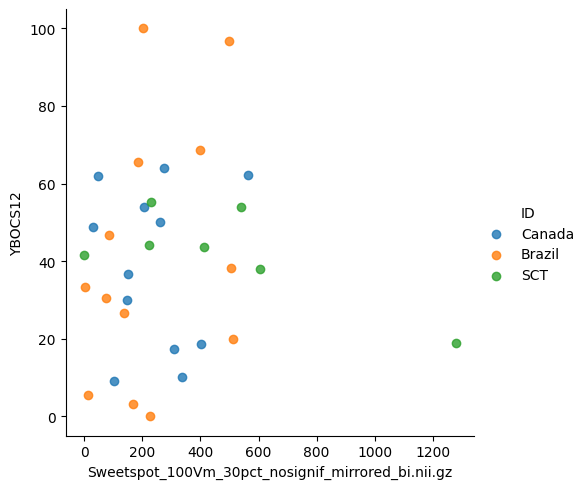

<Figure size 500x400 with 0 Axes>

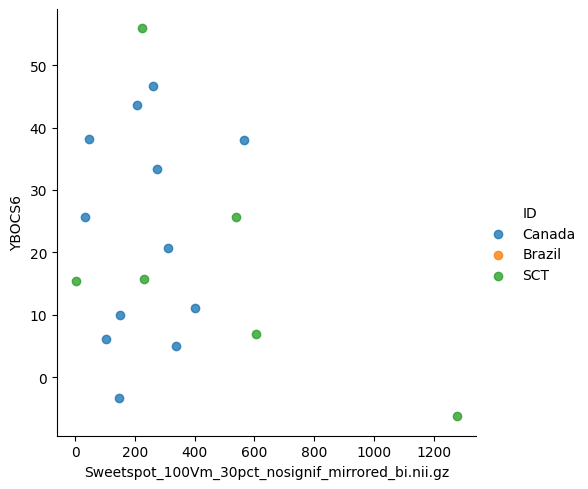

In [156]:
nsfm = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/nosignif_mirrored.csv')
for i in nsfm['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        nsfm['ID'] = nsfm['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        nsfm['ID'] = nsfm['ID'].replace(i,'Brazil')
    else:
        nsfm['ID'] = nsfm['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=nsfm, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_nosignif_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/nosignif_mirrored_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=nsfm, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_nosignif_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/nosignif_mirrored_6m.png')

<Figure size 500x400 with 0 Axes>

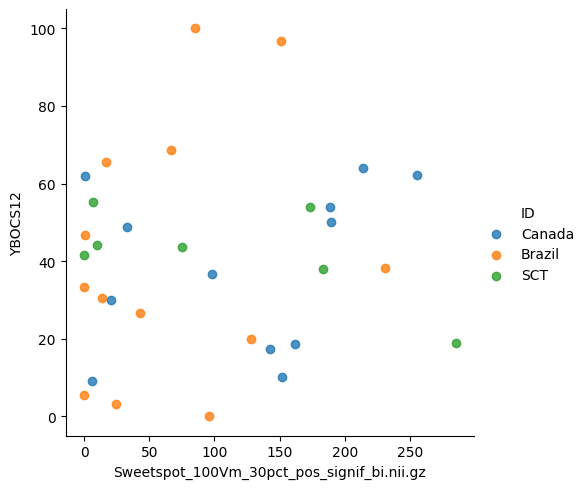

<Figure size 500x400 with 0 Axes>

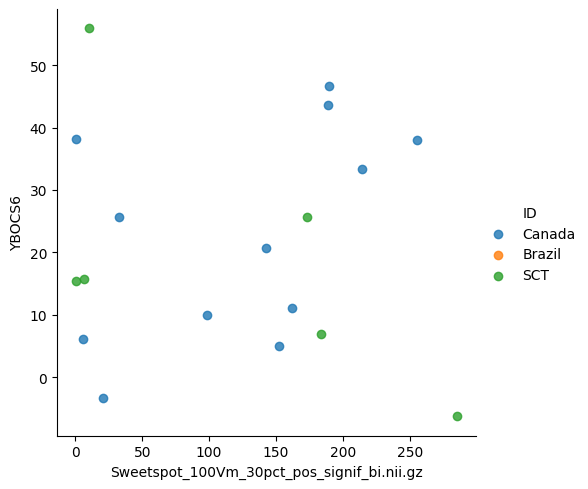

In [157]:
psfb = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/pos_signif_bi.csv')
for i in psfb['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        psfb['ID'] = psfb['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        psfb['ID'] = psfb['ID'].replace(i,'Brazil')
    else:
        psfb['ID'] = psfb['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=psfb, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_pos_signif_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/pos_signif_bi_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=psfb, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_pos_signif_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/pos_signif_bi_6m.png')

<Figure size 500x400 with 0 Axes>

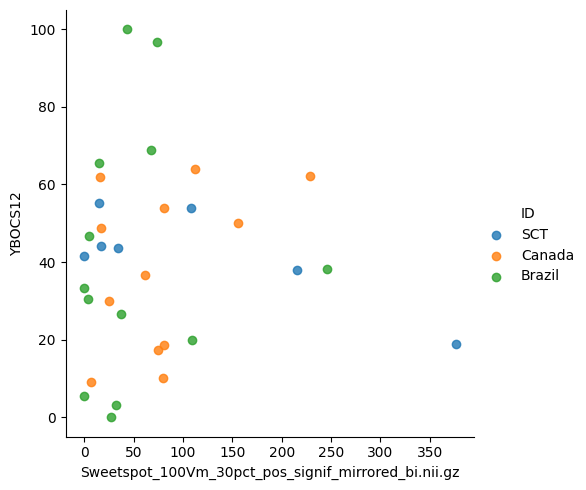

<Figure size 500x400 with 0 Axes>

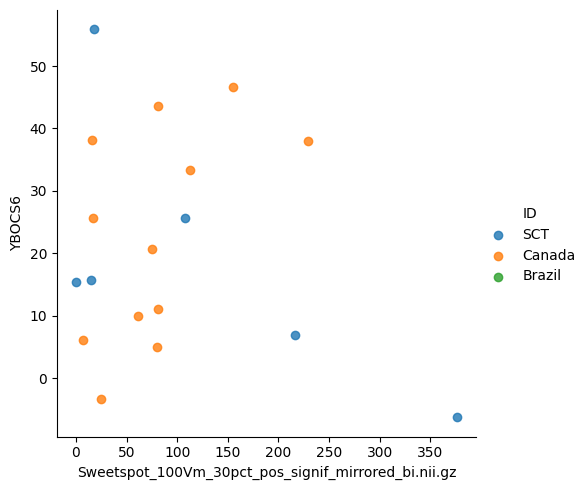

In [160]:
psfm = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/pos_signif_mirrored.csv')
for i in psfm['ID']:
    if i.endswith('SCT'):
        psfm['ID'] = psfm['ID'].replace(i,'SCT')
    elif i.endswith('B'):
        psfm['ID'] = psfm['ID'].replace(i,'Brazil')
    else:
        psfm['ID'] = psfm['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=psfm, x="overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/pos_signif_mirrored_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=psfm, x="overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Sweetspot_100Vm_30pct_pos_signif_mirrored_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/pos_signif_mirrored_6m.png')

<Figure size 500x400 with 0 Axes>

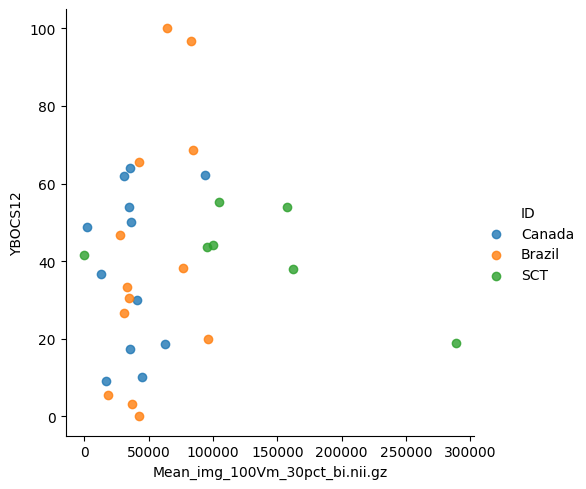

<Figure size 500x400 with 0 Axes>

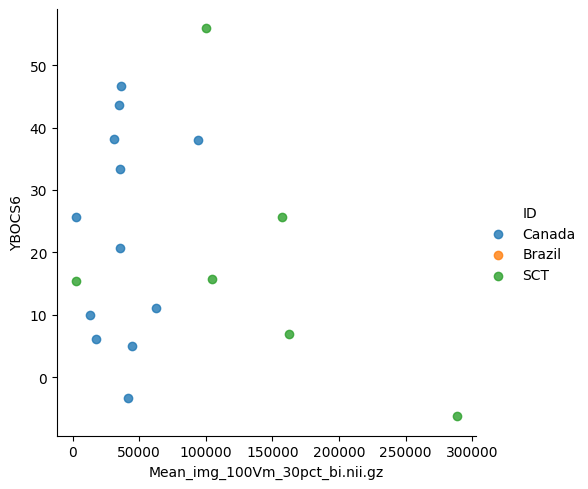

In [147]:
#mean_img
m = pd.read_csv('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/csv/mean_img.csv')
for i in m['ID']:
    if i.endswith('sim-binary_model-simbio.nii.gz'):
        m['ID'] = m['ID'].replace(i,'SCT')
    elif i.endswith('brazil_zones1-2.nii.gz'):
        m['ID'] = m['ID'].replace(i,'Brazil')
    else:
        m['ID'] = m['ID'].replace(i,'Canada')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=m, x="Volume_Overlap", y="Relative_YBOCS_Change_1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS12',xlabel='Mean_img_100Vm_30pct_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/mean_img_1y.png')

plt.figure(figsize=(5,4))
ax = sns.lmplot(data=m, x="Volume_Overlap", y="Relative_YBOCS_Change_<1y",hue='ID',fit_reg=False)
ax.set(ylabel='YBOCS6',xlabel='Mean_img_100Vm_30pct_bi.nii.gz')
plt.savefig('/Volumes/Cingulate/Cingulotomy/OCD_Hotspots/graphs/scatterplot/mean_img_6m.png')